In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from generation.grid import Grid

n = 21

def analyze(file_name, title, verbose=False):
    lengths = []
    num_entries = []
    num_length_3 = []
    num_length_n = []
    num_puzzles = 0
    with open(file_name, 'r') as f:
        line = 'temp'
        while line:
            g = Grid(n, generate_layout=False)
            num_puzzles += 1
            for i in range(n):
                line = f.readline().strip().replace(' ', '')
                if len(line) != n:
                    break
                for j in range(n):
                    g.cell(i + 1, j + 1).label = line[j]
            g.number_cells()
            lengths.extend([e.length for e in g.entries])
            num_entries.append(len(g.entries))
            num_length_3.append(sum(e.length==3 for e in g.entries))
            num_length_n.append(sum(e.length==n for e in g.entries))
            line = f.readline()

            if verbose:
                # analysis of unique entry lengths
                entry_lengths = np.array([e.length for e in g.entries])
                unique, counts = np.unique(entry_lengths, return_counts=True)
                print(f"n = {n}")
                print(g)
                print(np.asarray((unique, counts)).T)

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(lengths), bins=range(3, 22))
    ax.set_title(f'{title}, clue lengths, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_entries))
    ax.set_title(f'{title}, number of entries, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_length_3))
    ax.set_title(f'{title}, number of entries with length 3, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    counts, edges, bars = ax.hist(np.array(num_length_n))
    ax.set_title(f'{title}, number of entries with length {n}, total over {num_puzzles} grids')
    plt.bar_label(bars)
    plt.show()

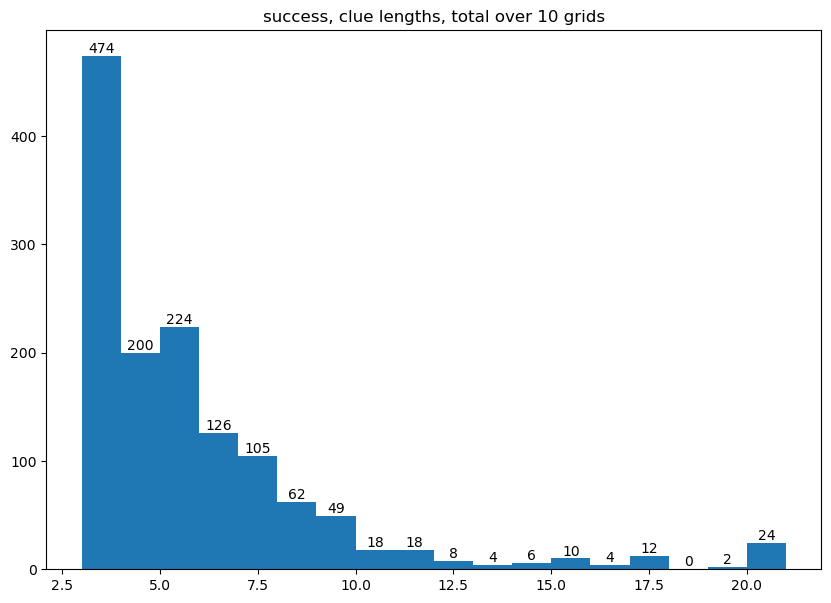

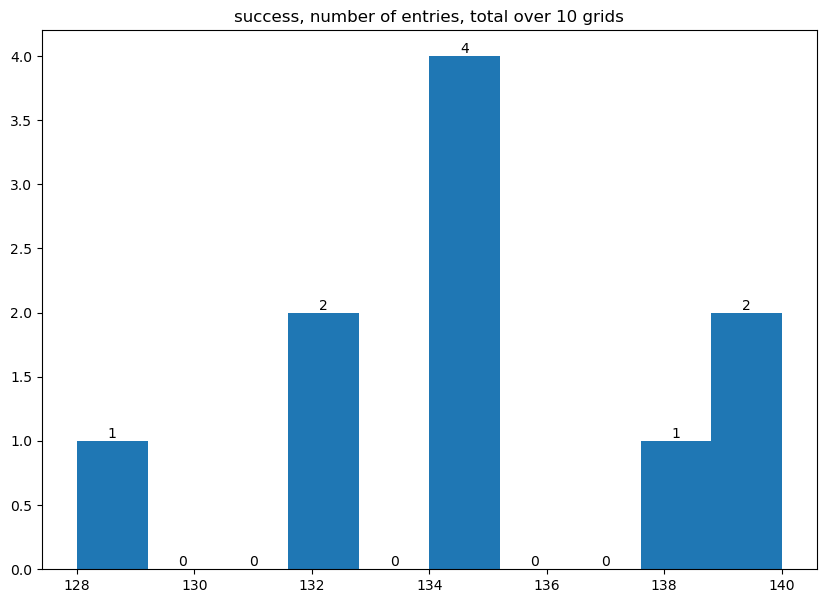

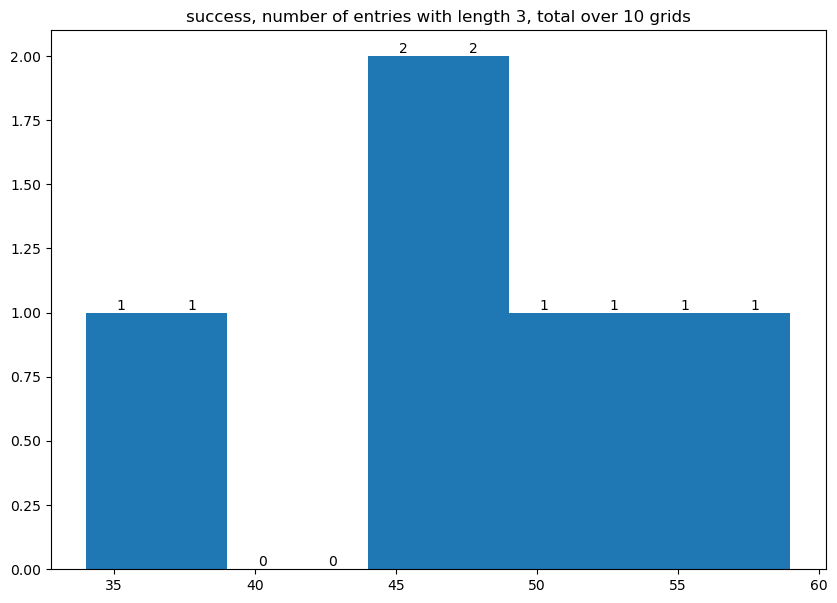

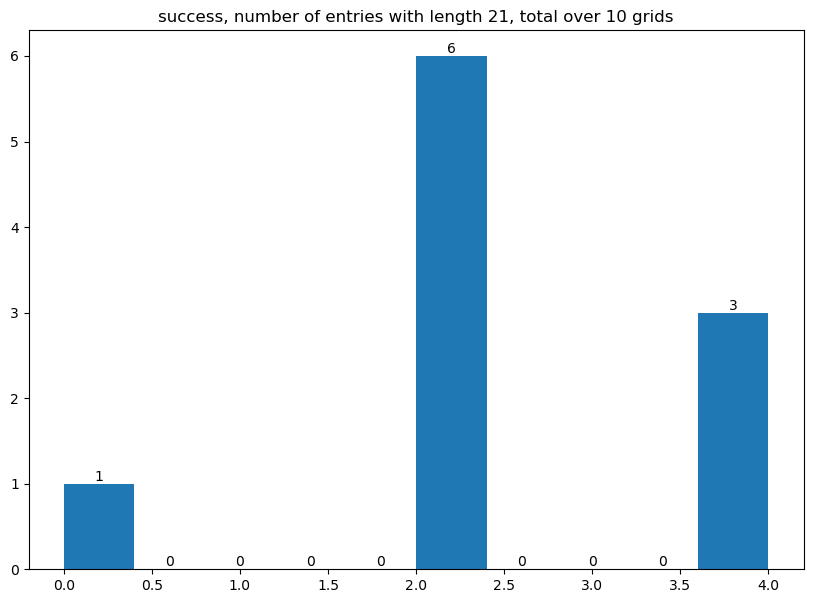

In [3]:
analyze(os.path.join(module_path, 'tests/results/21x21.txt'), 'success')

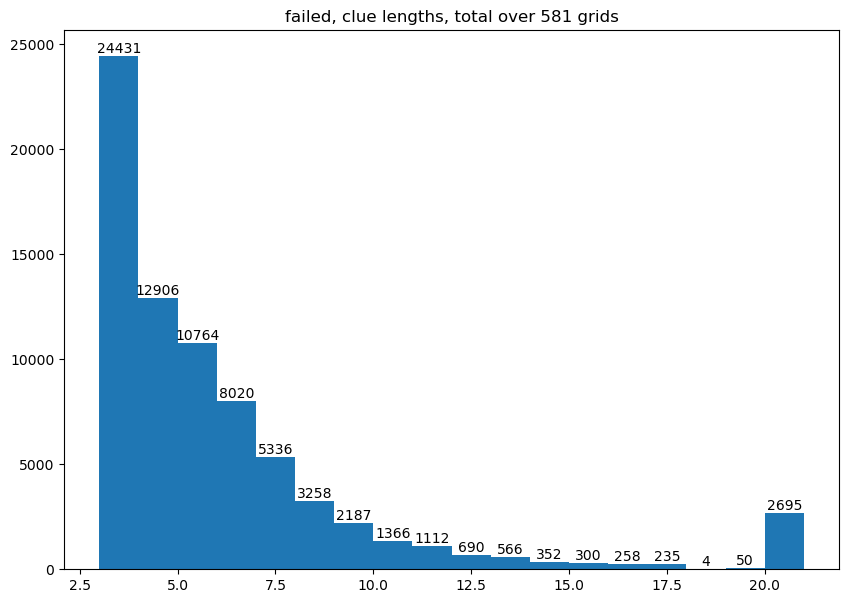

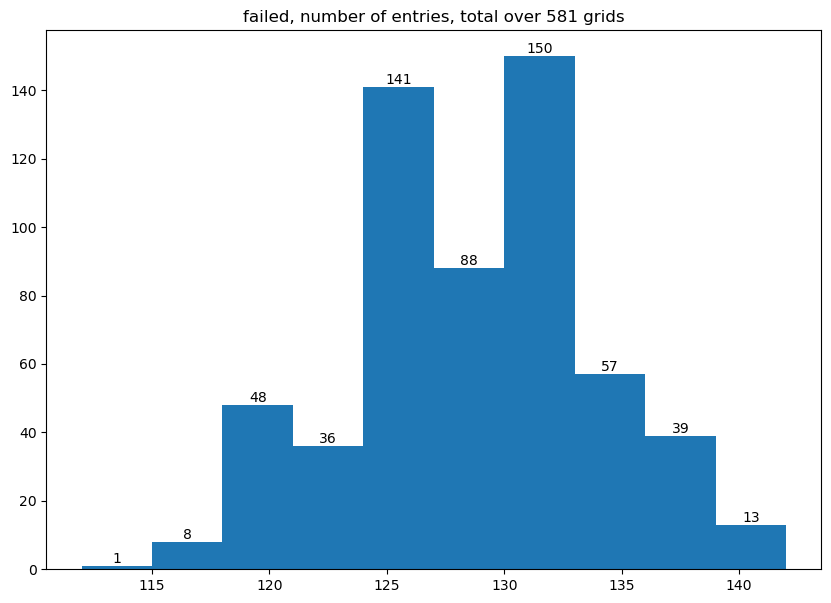

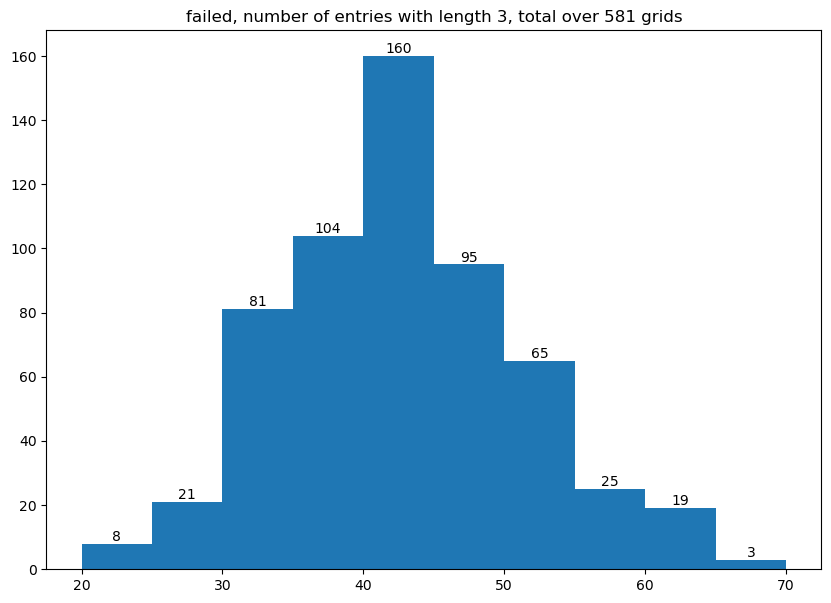

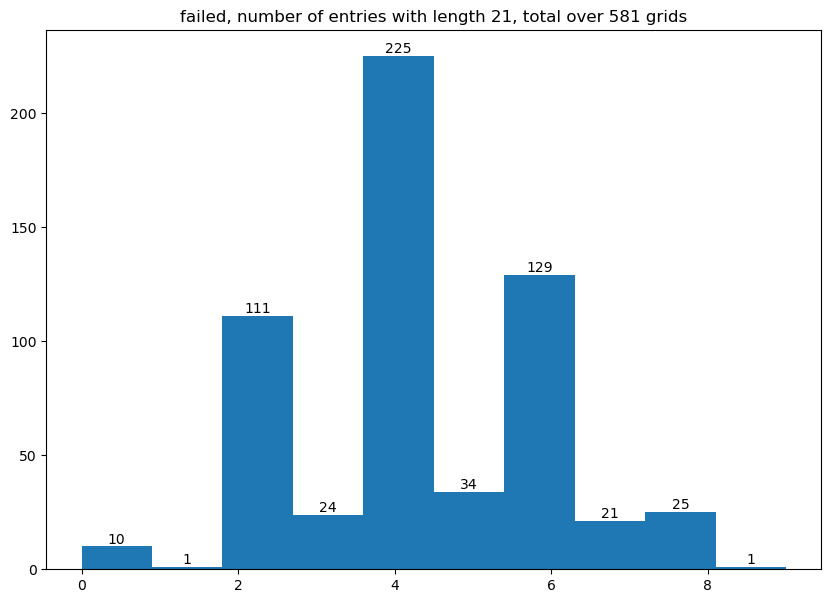

In [4]:
analyze(os.path.join(module_path, 'tests/results/21x21_failed.txt'), 'failed')